<a href="https://colab.research.google.com/github/Misha-private/Demo-repo/blob/main/Jims_method4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sympy_plot_backends[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.5/39.5 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.1/363.1 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3

# Target: A "fat tail" composition of 3 Gaussians

sigma = 32
sigma1 = 22.4
sigma2 = 44.8
sigma3 = 89.6
sigma_all=52.26666666666666
192.2785559555255


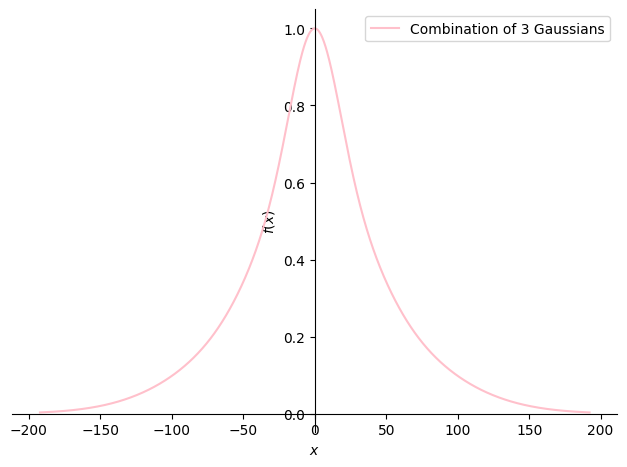

In [ ]:
import numpy as np
from sympy import *
from sympy.plotting import plot

x = symbols('x')


gauss1 = symbols('gauss1')
gauss2 = symbols('gauss2')
gauss3 = symbols('gauss3')
guss_all = symbols('guss_all')

sigma = symbols('sigma')
sigma1 = symbols('sigma1')
sigma2 = symbols('sigma2')
sigma3 = symbols('sigma3')

hzcale = [0.7, 1.4, 2.8]

''' Ratio of analysis and filter grid: an_to_filt'''

an_to_filt = 1

''' sf_h, lev = 65'''

sigma = 32 * an_to_filt

sigma1 = sigma*hzcale[0]
sigma2 = sigma*hzcale[1]
sigma3 = sigma*hzcale[2]

sigma_all = (sigma1 + sigma2 + sigma3)/3.

print(f'sigma = {sigma}')
print(f'sigma1 = {sigma1}')
print(f'sigma2 = {sigma2}')
print(f'sigma3 = {sigma3}')
print(f'sigma_all={sigma_all}')

gauss1 = exp(-(x/sigma1)**2)
gauss2 = exp(-(x/sigma2)**2)
gauss3 = exp(-(x/sigma3)**2)

gauss_all = (gauss1 + gauss2 + gauss3)/3.

xB3 = sigma3* np.sqrt(np.log(100))

print(xB3)

p = plot(gauss_all,(x,-xB3,xB3), legend=True, show=False)
p[0].line_color = 'pink'
p[0].label = 'Combination of 3 Gaussians'
p.show()

# Base functions

xB6=168.2086966322218


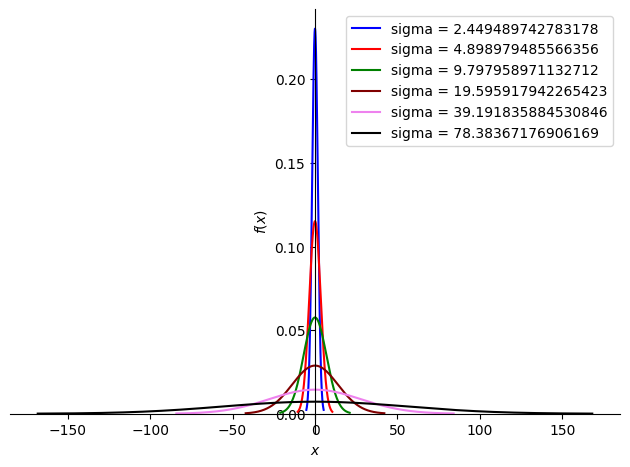

a = 2.449489742783178


In [ ]:
import numpy as np
from sympy import *
from sympy.plotting import plot


x = symbols('x')
n = symbols('n')
a = symbols('a')

s1 = symbols('s1')
s2 = symbols('s2')
s3 = symbols('s3')
s4 = symbols('s4')
s5 = symbols('s5')
s6 = symbols('s6')

g1 = symbols('g1')
g2 = symbols('g2')
g3 = symbols('g3')
g4 = symbols('g4')
g5 = symbols('g5')
g6 = symbols('g6')

def make_gauss(n,a,x):
  g = symbols('g')
  s = symbols('s')
  xB = symbols('xB')
  amp = symbols('amp')
  s = 2**(n-1)*a
  g = exp(-(x/s)**2)

  amp = integrate(g,(x,-oo,oo))
  xB = s* np.sqrt(np.log(100))
  return g/amp,xB,s
  #return g/amp

#a = sigma3/32
a = np.sqrt(6.)

n = 1
g1,xB1,s1 =make_gauss(n,a,x)
xL = -xB1
xR = xB1

p = plot(g1,(x,xL,xR), legend=True, show=False)
p[0].line_color = 'blue'
p[0].label = f'sigma = {s1}'


n = 2
g2,xB2,s2 =make_gauss(n,a,x)
xL = -xB2
xR = xB2

p.extend( plot(g2,(x,xL,xR), legend=True, show=False) )
p[1].line_color = 'red'
p[1].label = f'sigma = {s2}'

n = 3
g3,xB3,s3 =make_gauss(n,a,x)
xL = -xB3
xR = xB3

p.extend( plot(g3,(x,xL,xR), legend=True, show=False) )
p[2].line_color = 'green'
p[2].label = f'sigma = {s3}'

n = 4
g4,xB4,s4 =make_gauss(n,a,x)
xL = -xB4
xR = xB4

p.extend( plot(g4,(x,xL,xR), legend=True, show=False) )
p[3].line_color = 'maroon'
p[3].label = f'sigma = {s4}'


n = 5
g5,xB5,s5 =make_gauss(n,a,x)
xL = -xB5
xR = xB5

p.extend( plot(g5,(x,xL,xR), legend=True, show=False) )
p[4].line_color = 'violet'
p[4].label = f'sigma = {s5}'


n = 6
g6,xB6,s6 =make_gauss(n,a,x)
xL = -xB6
xR = xB6

print(f'xB6={xB6}')

p.extend( plot(g6,(x,xL,xR), legend=True, show=False) )
p[5].line_color = 'black'
p[5].label = f'sigma = {s6}'

p.show()

print(f"a = {a}")

# Solve the least squares problem with 6 weights

In [ ]:
p11 = symbols('p11')
p12 = symbols('p12')
p13 = symbols('p13')
p14 = symbols('p14')
p15 = symbols('p15')
p16 = symbols('p16')

p21 = symbols('p21')
p22 = symbols('p22')
p23 = symbols('p23')
p24 = symbols('p24')
p25 = symbols('p25')
p26 = symbols('p26')

p31 = symbols('p31')
p32 = symbols('p32')
p33 = symbols('p33')
p34 = symbols('p34')
p35 = symbols('p35')
p36 = symbols('p36')

p41 = symbols('p41')
p42 = symbols('p42')
p43 = symbols('p43')
p44 = symbols('p44')
p45 = symbols('p45')
p46 = symbols('p46')

p51 = symbols('p51')
p52 = symbols('p52')
p53 = symbols('p53')
p54 = symbols('p54')
p55 = symbols('p55')
p56 = symbols('p56')

p61 = symbols('p61')
p62 = symbols('p62')
p63 = symbols('p63')
p64 = symbols('p64')
p65 = symbols('p65')
p66 = symbols('p66')



In [ ]:
p11 = integrate(g1*g1,(x,-oo,oo))
p12 = integrate(g1*g2,(x,-oo,oo))
p13 = integrate(g1*g3,(x,-oo,oo))
p14 = integrate(g1*g4,(x,-oo,oo))
p15 = integrate(g1*g5,(x,-oo,oo))
p16 = integrate(g1*g6,(x,-oo,oo))

p21 = integrate(g2*g1,(x,-oo,oo))
p22 = integrate(g2*g2,(x,-oo,oo))
p23 = integrate(g2*g3,(x,-oo,oo))
p24 = integrate(g2*g4,(x,-oo,oo))
p25 = integrate(g2*g5,(x,-oo,oo))
p26 = integrate(g2*g6,(x,-oo,oo))

p31 = integrate(g3*g1,(x,-oo,oo))
p32 = integrate(g3*g2,(x,-oo,oo))
p33 = integrate(g3*g3,(x,-oo,oo))
p34 = integrate(g3*g4,(x,-oo,oo))
p35 = integrate(g3*g5,(x,-oo,oo))
p36 = integrate(g3*g6,(x,-oo,oo))

p41 = integrate(g4*g1,(x,-oo,oo))
p42 = integrate(g4*g2,(x,-oo,oo))
p43 = integrate(g4*g3,(x,-oo,oo))
p44 = integrate(g4*g4,(x,-oo,oo))
p45 = integrate(g4*g5,(x,-oo,oo))
p46 = integrate(g4*g6,(x,-oo,oo))

p51 = integrate(g5*g1,(x,-oo,oo))
p52 = integrate(g5*g2,(x,-oo,oo))
p53 = integrate(g5*g3,(x,-oo,oo))
p54 = integrate(g5*g4,(x,-oo,oo))
p55 = integrate(g5*g5,(x,-oo,oo))
p56 = integrate(g5*g6,(x,-oo,oo))

p61 = integrate(g6*g1,(x,-oo,oo))
p62 = integrate(g6*g2,(x,-oo,oo))
p63 = integrate(g6*g3,(x,-oo,oo))
p64 = integrate(g6*g4,(x,-oo,oo))
p65 = integrate(g6*g5,(x,-oo,oo))
p66 = integrate(g6*g6,(x,-oo,oo))

p11_val = float(p11.evalf())
p12_val = float(p12.evalf())
p13_val = float(p13.evalf())
p14_val = float(p14.evalf())
p15_val = float(p15.evalf())
p16_val = float(p16.evalf())

p21_val = float(p21.evalf())
p22_val = float(p22.evalf())
p23_val = float(p23.evalf())
p24_val = float(p24.evalf())
p25_val = float(p25.evalf())
p26_val = float(p26.evalf())

p31_val = float(p31.evalf())
p32_val = float(p32.evalf())
p33_val = float(p33.evalf())
p34_val = float(p34.evalf())
p35_val = float(p35.evalf())
p36_val = float(p36.evalf())

p41_val = float(p41.evalf())
p42_val = float(p42.evalf())
p43_val = float(p43.evalf())
p44_val = float(p44.evalf())
p45_val = float(p45.evalf())
p46_val = float(p46.evalf())

p51_val = float(p51.evalf())
p52_val = float(p52.evalf())
p53_val = float(p53.evalf())
p54_val = float(p54.evalf())
p55_val = float(p55.evalf())
p56_val = float(p56.evalf())

p61_val = float(p61.evalf())
p62_val = float(p62.evalf())
p63_val = float(p63.evalf())
p64_val = float(p64.evalf())
p65_val = float(p65.evalf())
p66_val = float(p66.evalf())



In [ ]:
print(f"p11_val = {p11_val}")
print(f"p12_val = {p12_val}")
print(f"p13_val = {p13_val}")
print(f"p14_val = {p14_val}")
print(f"p15_val = {p15_val}")
print(f"p16_val = {p16_val}")

p11_val = 0.16286750396764
p12_val = 0.10300645387285058
p13_val = 0.055863092992284404
p14_val = 0.02856885008786761
p15_val = 0.014367555280442455
p16_val = 0.007194282804459043


In [ ]:

b1 = symbols('b1')
b2 = symbols('b2')
b3 = symbols('b3')
b4 = symbols('b4')
b5 = symbols('b5')
b6 = symbols('b6')

b1 = integrate(g1*gauss_all,(x,-oo,oo))
b2 = integrate(g2*gauss_all,(x,-oo,oo))
b3 = integrate(g3*gauss_all,(x,-oo,oo))
b4 = integrate(g4*gauss_all,(x,-oo,oo))
b5 = integrate(g5*gauss_all,(x,-oo,oo))
b6 = integrate(g6*gauss_all,(x,-oo,oo))

b1_val = float(b1.evalf())
b2_val = float(b2.evalf())
b3_val = float(b3.evalf())
b4_val = float(b4.evalf())
b5_val = float(b5.evalf())
b6_val = float(b6.evalf())



In [ ]:
a = np.array([[p11_val,p12_val,p13_val,p14_val,p15_val,p16_val],
              [p21_val,p22_val,p23_val,p24_val,p25_val,p26_val],
              [p31_val,p32_val,p33_val,p34_val,p35_val,p36_val],
              [p41_val,p41_val,p43_val,p44_val,p45_val,p46_val],
              [p51_val,p52_val,p53_val,p54_val,p55_val,p56_val],
              [p61_val,p62_val,p63_val,p64_val,p65_val,p66_val]],dtype=float)

b = np.array([b1_val,b2_val,b3_val,b4_val,b5_val,b6_val],dtype=float)

solution = np.linalg.solve(a, b)
solution

array([-0.07214147,  0.38170159, -1.44655217, 12.36999901, 17.08329692,
       62.80012803])

### Test SciPy solution using nnls

In [ ]:
from scipy.optimize import nnls
nnls_solution = nnls(a,b)
print(nnls_solution)

(array([ 0.        ,  0.        ,  0.        ,  8.5591628 , 22.97101071,
       58.86317341]), 0.0019684138662037984)


In [ ]:
k1 = nnls_solution[0][0]
k2 = nnls_solution[0][1]
k3 = nnls_solution[0][2]
k4 = nnls_solution[0][3]
k5 = nnls_solution[0][4]
k6 = nnls_solution[0][5]

print(k1)
print(k2)
print(k3)
print(k4)
print(k5)
print(k6)


0.0
0.0
0.0
8.559162797458264
22.97101071303191
58.863173410917646


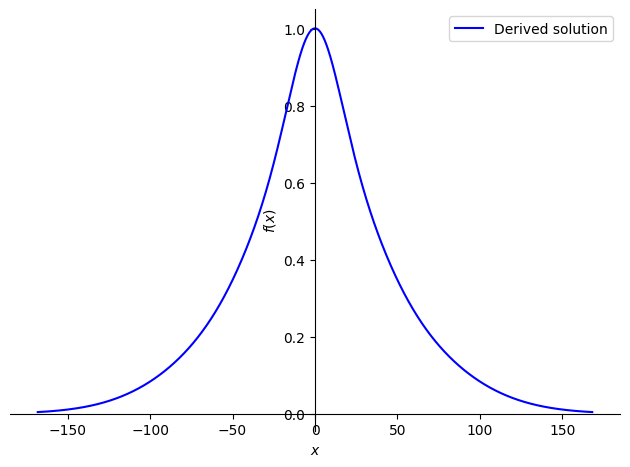

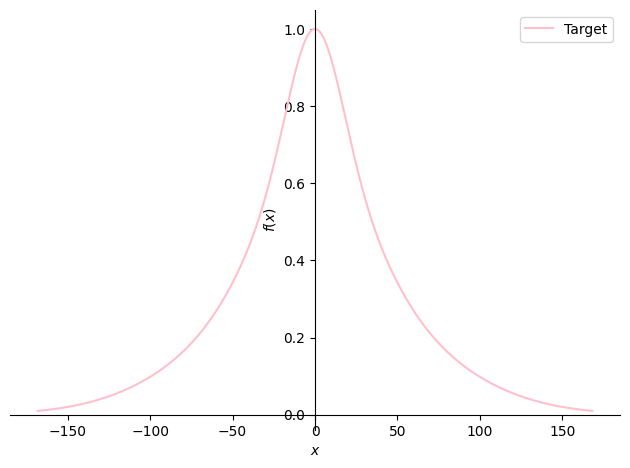

In [ ]:
w1 = symbols('w1')
w2 = symbols('w2')
w3 = symbols('w3')
w4 = symbols('w4')
w5 = symbols('w5')
w6 = symbols('w6')

w1 = nnls_solution[0][0]
w2 = nnls_solution[0][1]
w3 = nnls_solution[0][2]
w4 = nnls_solution[0][3]
w5 = nnls_solution[0][4]
w6 = nnls_solution[0][5]

beta_all = w1*g1 + w2*g2 + w3*g3 + w4*g4 + w5*g5 + w6*g6

d = plot(beta_all,(x,-xB6,xB6), legend=True, show=False)
d[0].line_color = 'blue'
d[0].label = 'Derived solution'
d.show()


p = plot(gauss_all,(x,-xB6,xB6), legend=True, show=False)
p[0].line_color = 'pink'
p[0].label ='Target'
p.show()

In [ ]:
print(f"w1 = {w1}")
print(f"w2 = {w2}")
print(f"w3 = {w3}")
print(f"w4 = {w4}")
print(f"w5 = {w5}")
print(f"w6 = {w6}")

w1 = 0.0
w2 = 0.0
w3 = 0.0
w4 = 0.0
w5 = 0.0
w6 = 146.36656015569102
